In [ ]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import wordcloud as wc
import nltk
from nltk.corpus import stopwords
from IPython.display import clear_output
from textblob import TextBlob
from scipy import stats
import nltk
nltk.download('punkt')
nltk.download('movie_reviews')
warnings.filterwarnings('ignore', message='Unverified HTTPS request')
pd.options.display.float_format = '{:,.4f}'.format
pd.options.mode.chained_assignment = None
# !!nltk es para los ngramas
#https://www.kaggle.com/code/abonaplata/analisis-exploratorio-de-datos-con-python/notebook#2.-An%C3%A1lisis-univariable:-'SalePrice'
#https://pharos.sh/analisis-de-sentimientos-en-python-con-textblob/
#https://neuraldojo.org/proyectos/analisis-de-sentimiento/guia-basica-de-analisis-de-sentimiento-en-python/

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


# Best sellers

### México

In [ ]:
base_mx = pd.read_excel('base_mx.xlsx')
reviews_mx = pd.read_excel('reviews_mx.xlsx')
base_mx = base_mx[['id', 'title', 'price', 'original_price', 'sold_quantity',
       'Marca', 'Condición del ítem', 'Modelo', 'free_shipping', 'rating',
       'from_trend']].drop_duplicates()
base_mx

,id,title,price,original_price,sold_quantity,Marca,Condición del ítem,Modelo,free_shipping,rating,from_trend
0,MLM1348021632,Samsung Galaxy A22 64 Gb White 4 Gb Ram,"3,799.0000","4,499.0000",488,Samsung,Nuevo,A22,1,5.0000,0
1,MLM1414111760,Xiaomi Redmi Note 11 (snapdragon) Dual Sim 128...,"3,799.0000",NaN,992,Xiaomi,Nuevo,Note 11 (Snapdragon),1,4.8000,0
2,MLM1395381120,Samsung Galaxy M32 (5000 Mah) Dual Sim 128 Gb ...,"3,969.0000","4,999.0000",1748,Samsung,Nuevo,M32 (5000 mAh),1,4.6000,0
3,MLM1397369378,Samsung Galaxy A03 128 Gb Azul 4 Gb Ram,"3,099.0000","3,599.0000",1527,Samsung,Nuevo,A03,1,4.6000,0
4,MLM1453436209,Xiaomi Pocophone Poco M3 Pro 5g Dual Sim 128 G...,"4,408.8000",NaN,121,Xiaomi,Nuevo,Poco M3 Pro 5G,1,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...
14480,MLM1376085949,Xiaomi Poco F3 5g Dual Sim 128 Gb Azul Océano ...,"6,793.5600",NaN,227,Xiaomi,Nuevo,Poco F3 5G,1,4.6000,1
14481,MLM1478103425,Xiaomi Pocophone Poco F4 Gt Dual Sim 256 Gb St...,"12,399.0000","14,099.0000",24,Xiaomi,Nuevo,Poco F4 GT,1,0.0000,1
14482,MLM1486357453,Xiaomi Pocophone Poco F4 Gt Dual Sim 256 Gb Cy...,"12,525.0000",NaN,10,Xiaomi,Nuevo,Poco F4 GT,1,0.0000,1
14483,MLM1458738801,Xiaomi Poco F4 5g 256gb - 8gb Global Dual Nuev...,"8,299.0000",NaN,25,Xiaomi,Nuevo,F4 5G,1,0.0000,1


In [ ]:
reviews_mx

,Unnamed: 0,id,reviewable_object,date_created,status,title,content,rate,valorization,likes,dislikes,reviewer_id,buying_date,relevance,forbidden_words
0,0,129816983,MLM1348021632,2021-12-28T02:05:43Z,published,Excelente,"Muy bueno, sin fallas, sin ponerse lento. El d...",5,2,3,1,44861575,2021-12-10T18:46:33Z,18,0
1,1,129247994,MLM1348021632,2021-12-21T21:58:18Z,published,Recomendado tiene lo que se requiere,"Mejor de lo que esperaba, cumple con mis expe...",5,1,1,0,127947549,2021-12-03T01:14:11Z,9,0
2,2,139913365,MLM1348021632,2022-04-11T17:49:41Z,published,Excelente,Muy buen producto. Justo lo que dice ser.,5,0,0,0,570208695,2021-12-11T07:19:24Z,8,0
3,3,131320889,MLM1348021632,2022-01-10T19:40:40Z,published,Excelente,3b's vale la pena tener este celular.,5,0,0,0,399913944,2021-12-12T04:39:25Z,8,0
4,4,153282194,MLM1348021632,2022-08-27T02:13:06Z,published,Excelente,Muy buen articulo completamente nuevo.,5,0,0,0,46425583,2022-08-12T01:19:40Z,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3898,0,146429574,MLM1376085949,2022-06-17T03:14:20Z,published,Excelente teléfono gaming y muy bonito,Excelente teléfono lo uso para juegos y va de ...,5,0,0,0,82056998,2022-06-05T07:31:26Z,64,0
3899,1,148056427,MLM1376085949,2022-07-02T22:21:38Z,published,Muy bueno,Al principio me espante porque se me descargo ...,4,0,0,0,294548437,2022-06-16T23:13:37Z,63,0
3900,2,146147607,MLM1376085949,2022-06-14T18:20:59Z,published,Buena compra,"Me gusta mucho, rápido, buena pantalla, cámara...",5,0,0,0,65285333,2022-05-30T18:11:46Z,40,20
3901,3,150018819,MLM1376085949,2022-07-24T14:56:45Z,published,Bueno,"La relación de precio y calidad es excelente, ...",4,0,0,0,131465992,2022-05-31T15:27:35Z,32,0


In [ ]:
reviews_mx = reviews_mx[['id', 'reviewable_object', 'date_created', 'status',
       'title', 'content', 'rate', 'valorization', 'likes', 'dislikes',
       'reviewer_id', 'buying_date', 'relevance', 'forbidden_words']]
ids = reviews_mx['reviewer_id'].drop_duplicates()
brand = []
for i in range(len(reviews_mx['reviewable_object'])):
    brand.append({"reviewable_object": reviews_mx['reviewable_object'][i], "Marca":base_mx[base_mx['id']==reviews_mx['reviewable_object'][i].replace("'", '')]['Marca'].tolist()[0]})
brand=pd.DataFrame(brand).drop_duplicates()
reviews_mx = reviews_mx.merge(brand, on="reviewable_object", how="left")
reviews_mx.head(5)

,id,reviewable_object,date_created,status,title,content,rate,valorization,likes,dislikes,reviewer_id,buying_date,relevance,forbidden_words,Marca
0,129816983,MLM1348021632,2021-12-28T02:05:43Z,published,Excelente,"Muy bueno, sin fallas, sin ponerse lento. El d...",5,2,3,1,44861575,2021-12-10T18:46:33Z,18,0,Samsung
1,129247994,MLM1348021632,2021-12-21T21:58:18Z,published,Recomendado tiene lo que se requiere,"Mejor de lo que esperaba, cumple con mis expe...",5,1,1,0,127947549,2021-12-03T01:14:11Z,9,0,Samsung
2,139913365,MLM1348021632,2022-04-11T17:49:41Z,published,Excelente,Muy buen producto. Justo lo que dice ser.,5,0,0,0,570208695,2021-12-11T07:19:24Z,8,0,Samsung
3,131320889,MLM1348021632,2022-01-10T19:40:40Z,published,Excelente,3b's vale la pena tener este celular.,5,0,0,0,399913944,2021-12-12T04:39:25Z,8,0,Samsung
4,153282194,MLM1348021632,2022-08-27T02:13:06Z,published,Excelente,Muy buen articulo completamente nuevo.,5,0,0,0,46425583,2022-08-12T01:19:40Z,5,0,Samsung


In [ ]:
base_mx.groupby('title')['sold_quantity'].sum().to_frame().sort_values(by=['sold_quantity'], ascending=False)

,sold_quantity
title,
Xiaomi Redmi 9a Dual Sim 64 Gb Azul Celeste 4 Gb Ram,47113
Xiaomi Redmi 10c Dual Sim 128 Gb Azul Océano 4 Gb Ram,20668
Samsung Galaxy A52 128 Gb Azul Sorprendente 6 Gb Ram,18734
Samsung Galaxy A52 128 Gb Negro Sorprendente 6 Gb Ram,12413
Samsung Galaxy A32 128 Gb Awesome Black 4 Gb Ram,11110
...,...
Oneplus 9 128 Gb Liberado,0
Oneplus 9 128 Gb Astral Black 8 Gb Ram Impecable Caja Y Accs,0
Oneplus 9 1256gb 6.5 Android 11 Snapdragon 888 Nfc 65w,0


As we can see, the best-selling cell phone is Xiaomi Redmi 9a

# Most searched and best rating

#### Best rating:

### Mexico

In [ ]:
base_trends_mx = base_mx[base_mx['rating']!=0]
base_trends_mx.groupby('Marca')['rating'].mean().to_frame().sort_values(by=['rating'], ascending=False).head(10)

,rating
Marca,
ivarma,5.0000
Inovacel,5.0000
Raters,5.0000
KaiOS,5.0000
Realme,4.8000
TCL,4.8000
OnePlus,4.8000
NaomiCase,4.8000
L8star,4.7667


#### Most searched

In [ ]:
base_buscados_mx = base_mx
base_buscados_mx.groupby('Marca')['from_trend'].sum().to_frame().sort_values(by=['from_trend'], ascending=False).head(10)

,from_trend
Marca,
Apple,6016
Samsung,1900
Xiaomi,1610
Motorola,1173
Oppo,708
OnePlus,390
Realme,297
Generic,280
Huawei,132


# Descriptive analytics to determine purchase patterns according to the country, brand, price and other variables.

### Mexico

General information of the columns:

In [ ]:
base_mx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14485 entries, 0 to 14484
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  14485 non-null  object 
 1   title               14485 non-null  object 
 2   price               14485 non-null  float64
 3   original_price      1843 non-null   float64
 4   sold_quantity       14485 non-null  int64  
 5   Marca               14469 non-null  object 
 6   Condición del ítem  14475 non-null  object 
 7   Modelo              14460 non-null  object 
 8   free_shipping       14485 non-null  int64  
 9   rating              14485 non-null  float64
 10  from_trend          14485 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.3+ MB


Analysis of the usefulness of the item condition column:

In [ ]:
base_mx['Condición del ítem'].unique()

array(['Nuevo', 'Reacondicionado', 'Usado', nan], dtype=object)

With the count of items per condition, we can see that there is more supply of used products:

In [ ]:
base_mx['Condición del ítem'].value_counts().to_frame()

,Condición del ítem
Usado,8670
Nuevo,5023
Reacondicionado,782


However, customers prefer products in new condition:

In [ ]:
base_mx.groupby('Condición del ítem')['sold_quantity'].sum().to_frame().sort_values(by=['sold_quantity'], ascending=False).head(10)

,sold_quantity
Condición del ítem,
Nuevo,459599
Reacondicionado,7528
Usado,1958


Assign numerical values to check later if it has any correlation with the other columns:

In [ ]:
base_mx['Condición del ítem'] = base_mx['Condición del ítem'].map({'Nuevo': 1, 'Usado': 0, 'Reacondicionado': 2})

In the following table we can see the number of products purchased by brand with the rating them have. It is possible to notice that the most purchased brand is Xiaomi with a high rating and it is followed by Samsung that has a higher average price.

In [ ]:
base_trends_mx = base_mx[base_mx['rating']!=0]
print('Total registros con rating: '+str(len(base_trends_mx)))
base_trends_mx.groupby(['Marca']).agg({'sold_quantity':'sum','rating':'mean', 'price':'mean'}).sort_values(by=['sold_quantity', 'rating'], ascending=False).head(10)

Total registros con rating: 808


,sold_quantity,rating,price
Marca,,,
Xiaomi,194448,4.6059,"4,728.4310"
Samsung,118243,4.5616,"6,377.0587"
Motorola,20011,4.5192,"4,651.6025"
ZTE,18626,4.4171,"1,755.7188"
Huawei,8983,4.0929,"4,791.4286"
Apple,7953,4.1600,"11,255.3126"
Realme,7532,4.8000,"5,487.1450"
NaomiPhone,6350,3.7824,"1,100.8588"
LG,2940,4.0500,"3,127.5000"


Now let's look at the price column. When making a description, we get a very high maximum value, which could be due to an error in loading the item's attributes. For this, we will remove the outliers later.

In [ ]:
base_mx['price'].describe()

count    14,485.0000
mean      8,221.4136
std       6,857.0132
min          35.0000
25%       3,899.0000
50%       6,200.0000
75%      10,500.0000
max     100,000.0000
Name: price, dtype: float64

In [ ]:
base_mx.sort_values(by=['price'], ascending=False).head(10)

,id,title,price,original_price,sold_quantity,Marca,Condición del ítem,Modelo,free_shipping,rating,from_trend
13871,MLM1463907071,iPhone 11 Pro Max 64 Gb Gris Espacial,"100,000.0000",NaN,0,Apple,0.0000,iPhone 11 Pro Max,1,0.0000,1
2630,MLM1485361611,Xiaomi Black Shark 4 128gb Black 6gb Ram 98% S...,"99,600.0000",NaN,0,Xiaomi,0.0000,Black Shark 4,0,0.0000,1
2634,MLM1458885832,Xiaomi Mi 11t Dual Sim 256gb Gris 8gb Ram 98% ...,"94,430.0000",NaN,0,Xiaomi,0.0000,11T,1,0.0000,1
2469,MLM1470605493,Xiaomi Poco X3 Gt Dual Sim 256gb Black 8gb Ram...,"81,990.0000",NaN,0,Xiaomi,0.0000,Poco X3 GT,0,0.0000,1
2503,MLM1485853005,Xiaomi Poco X4 Pro 5g 256gb Yellow 8gb Ram 98%...,"70,900.0000",NaN,0,Xiaomi,0.0000,Poco X4 Pro 5G,0,0.0000,1
2559,MLM1485375009,Xiaomi Black Shark 4 256gb Black 8gb Ram 98% S...,"70,500.0000",NaN,0,Xiaomi,0.0000,Black Shark 4,0,0.0000,1
2624,MLM1467269697,Xiaomi Poco X3 Gt Dual Sim 128gb White 8gb Ram...,"66,670.0000",NaN,0,Xiaomi,0.0000,Poco X3 GT,0,0.0000,1
2560,MLM1470599357,Xiaomi Poco X3 Gt Dual Sim 256gb White 8gb Ram...,"65,890.0000",NaN,0,Xiaomi,0.0000,Poco X3 GT,0,0.0000,1
2596,MLM1465904348,Xiaomi Poco F3 5g Dual Sim 128gb Negro 6gb Ram...,"61,980.0000",NaN,0,Xiaomi,0.0000,Poco F3 5G,1,0.0000,1
2678,MLM1463444172,Xiaomi Mi 11lite 5g 128gb Negro Trufa 6gb Ram ...,"58,880.0000",NaN,0,Xiaomi,0.0000,11 Lite 5G,1,0.0000,1


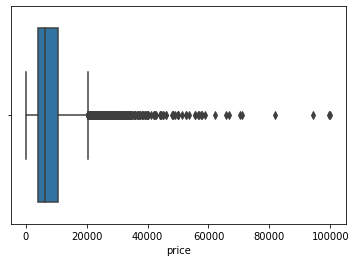

In [ ]:
sns.boxplot(x=base_mx['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


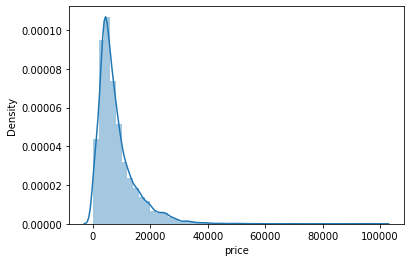

In [ ]:
sns.distplot(base_mx['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


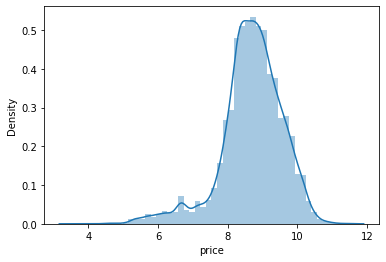

In [ ]:
log_transformed = np.log(base_mx['price'])
sp_transformed = sns.distplot(log_transformed)

In [ ]:
print("Asymmetry: %f" % base_mx['price'].skew())
print("Kurtosis: %f" % base_mx['price'].kurt())

Asimetría: 2.517818
Curtosis: 13.506824


Eliminate outliers

In [ ]:
z= stats.zscore(log_transformed)
base_mx = base_mx[(z < 3)]

In [ ]:
base_mx['price'].describe()

count   14,482.0000
mean     8,202.8135
std      6,734.7238
min         35.0000
25%      3,899.0000
50%      6,200.0000
75%     10,500.0000
max     81,990.0000
Name: price, dtype: float64

In [ ]:
base_mx['sold_quantity'].describe()

count   14,482.0000
mean        32.3912
std        270.3962
min          0.0000
25%          0.0000
50%          0.0000
75%          2.0000
max     12,407.0000
Name: sold_quantity, dtype: float64

Now, we continue with the analysis of correlations. The only variables that come close to having a correlation are the number of sales with the rating, however, in this case it is not relevant since most products do not have a rating (they only have 808 out of 14485).

In [ ]:
base_num = base_mx.select_dtypes(include = ['float64', 'int64'])
base_num.corr()

,price,original_price,sold_quantity,Condición del ítem,free_shipping,rating,from_trend
price,1.0000,0.9898,-0.0660,-0.0901,0.0017,-0.1126,0.0836
original_price,0.9898,1.0000,-0.0947,0.1767,0.0505,-0.1427,0.0604
sold_quantity,-0.0660,-0.0947,1.0000,0.1118,0.0484,0.4221,-0.0960
Condición del ítem,-0.0901,0.1767,0.1118,1.0000,0.2992,0.2338,-0.2744
free_shipping,0.0017,0.0505,0.0484,0.2992,1.0000,0.0980,-0.1093
rating,-0.1126,-0.1427,0.4221,0.2338,0.0980,1.0000,-0.2751
from_trend,0.0836,0.0604,-0.0960,-0.2744,-0.1093,-0.2751,1.0000


Here we can see a scatter chart that shows the accumulation of products sold in rating 0, since they have no rating, and an accumulation in the positive rating, so it could be said that users tend to buy products with a good rating.

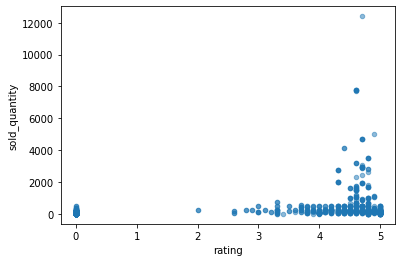

In [ ]:
data = pd.concat([base_mx['sold_quantity'], base_mx['rating']], axis=1)
data.plot.scatter(x='rating', y='sold_quantity', alpha = 0.5)

In [ ]:
data = pd.concat([base_mx['sold_quantity'], base_mx['price']], axis=1)

We see that most of the products have free shipping, however, it is interesting to note that there are 2146 products without this feature since normally when exceeding an amount, the product has free shipping.

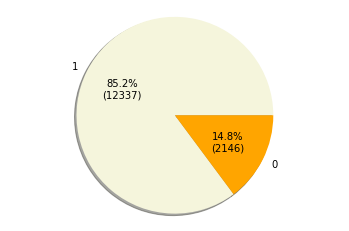

In [ ]:
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d})".format(pct, absolute)

colors = ("beige", "orange")

base_mx['free_shipping'].value_counts(ascending=False).to_frame()
data = base_mx['free_shipping'].value_counts()
plt.pie(data, labels=base_mx['free_shipping'].unique(), colors=colors, shadow=True,autopct= lambda pct: func(pct, data))
plt.axis("equal")
plt.show()

In [ ]:
base_mx['Condición del ítem'] = base_mx['Condición del ítem'].map({1:'Nuevo', 0:'Usado', 2: 'Reacondicionado'})

In [ ]:
base_mx[base_mx['free_shipping']==0].sort_values(by=['price'], ascending=False).head(10)

,id,title,price,original_price,sold_quantity,Marca,Condición del ítem,Modelo,free_shipping,rating,from_trend
2630,MLM1485361611,Xiaomi Black Shark 4 128gb Black 6gb Ram 98% S...,"99,600.0000",NaN,0,Xiaomi,NaN,Black Shark 4,0,0.0000,1
2469,MLM1470605493,Xiaomi Poco X3 Gt Dual Sim 256gb Black 8gb Ram...,"81,990.0000",NaN,0,Xiaomi,NaN,Poco X3 GT,0,0.0000,1
2503,MLM1485853005,Xiaomi Poco X4 Pro 5g 256gb Yellow 8gb Ram 98%...,"70,900.0000",NaN,0,Xiaomi,NaN,Poco X4 Pro 5G,0,0.0000,1
2559,MLM1485375009,Xiaomi Black Shark 4 256gb Black 8gb Ram 98% S...,"70,500.0000",NaN,0,Xiaomi,NaN,Black Shark 4,0,0.0000,1
2624,MLM1467269697,Xiaomi Poco X3 Gt Dual Sim 128gb White 8gb Ram...,"66,670.0000",NaN,0,Xiaomi,NaN,Poco X3 GT,0,0.0000,1
2560,MLM1470599357,Xiaomi Poco X3 Gt Dual Sim 256gb White 8gb Ram...,"65,890.0000",NaN,0,Xiaomi,NaN,Poco X3 GT,0,0.0000,1
2537,MLM1485592808,Xiaomi Poco X4 Pro 5g 128gb Black 6gb Ram 98% ...,"57,620.0000",NaN,0,Xiaomi,NaN,Poco X4 Pro 5G,0,0.0000,1
2477,MLM1485547405,Xiaomi Poco X4 Pro 5g 128gb Laser Blue 6gb Ram...,"55,440.0000",NaN,0,Xiaomi,NaN,Poco X4 Pro 5G,0,0.0000,1
2531,MLM1485579853,Xiaomi Poco X4 Pro 5g 128gb Yellow 6gb Ram 98%...,"55,440.0000",NaN,0,Xiaomi,NaN,Poco X4 Pro 5G,0,0.0000,1
2662,MLM1463420302,Xiaomi Mi 10 Lite Dual Sim 128gb Gris 6gb Ram9...,"52,680.0000",NaN,0,Xiaomi,NaN,10 Lite,0,0.0000,1


In [ ]:
base_mx[base_mx['free_shipping']==0].groupby(['Condición del ítem']).agg({'id':'count', 'sold_quantity':'sum'}).sort_values(by=['id'], ascending=False)

,id,sold_quantity
Condición del ítem,,


Taking into account the Samsung and Huawei brands, we have that the majority of purchases are from the Samsung brand

In [ ]:
base_mx.query('Marca=="Samsung" | Marca=="Huawei"').groupby('Marca')['sold_quantity'].sum().to_frame().sort_values(by=['sold_quantity'], ascending=False).head(10)

,sold_quantity
Marca,
Samsung,133435
Huawei,10969


The Xiami brand is the most purchased, followed by one of our target brands, Samsung

In [ ]:
base_mx.groupby(['Marca'])['sold_quantity'].sum().to_frame().sort_values(by=['sold_quantity'], ascending=False).head(10)

,sold_quantity
Marca,
Xiaomi,212684
Samsung,133435
Motorola,29925
ZTE,20390
Apple,13660
Huawei,10969
Realme,8815
NaomiPhone,6769
LG,3837


Here we can see the best selling model for each of our target brands: A52 and P30 Lite

In [ ]:
modelo = base_mx.query('Marca=="Samsung" | Marca=="Huawei"').groupby(['Modelo', 'Marca']).agg({'price':'mean', 'sold_quantity':'sum'}).sort_values(by=['sold_quantity'], ascending=False)
modelo.head(20)

,,price,sold_quantity
Modelo,Marca,,
A52,Samsung,"6,325.3979",39803
A03,Samsung,"3,175.0909",20295
A32,Samsung,"4,840.7723",14457
M32 (5000 mAh),Samsung,"3,969.0000",11065
A22,Samsung,"3,862.6364",9554
P30 Lite Dual SIM,Huawei,"4,673.0000",6178
A13 Dual SIM,Samsung,"4,109.3217",4996
M13,Samsung,"3,821.3333",3120
A03 Core,Samsung,"2,278.2292",1901


# Review the comments left by users and determine the sentiment (Positive-Negative-Neutral) for each brand

In [ ]:
reviews_mx.head()

,Unnamed: 0,id,reviewable_object,date_created,status,title,content,rate,valorization,likes,dislikes,reviewer_id,buying_date,relevance,forbidden_words
0,0,129816983,MLM134802163,2021-12-28T02:05:43Z,published,Excelente,"Muy bueno, sin fallas, sin ponerse lento. El d...",5,2,3,1,44861575,2021-12-10T18:46:33Z,18,0
1,1,129247994,MLM134802163,2021-12-21T21:58:18Z,published,Recomendado tiene lo que se requiere,"Mejor de lo que esperaba, cumple con mis expe...",5,1,1,0,127947549,2021-12-03T01:14:11Z,9,0
2,2,139913365,MLM134802163,2022-04-11T17:49:41Z,published,Excelente,Muy buen producto. Justo lo que dice ser.,5,0,0,0,570208695,2021-12-11T07:19:24Z,8,0
3,3,131320889,MLM134802163,2022-01-10T19:40:40Z,published,Excelente,3b's vale la pena tener este celular.,5,0,0,0,399913944,2021-12-12T04:39:25Z,8,0
4,4,153282194,MLM134802163,2022-08-27T02:13:06Z,published,Excelente,Muy buen articulo completamente nuevo.,5,0,0,0,46425583,2022-08-12T01:19:40Z,5,0


Choose the brands of interest:

In [ ]:
reviews_mx['Marca'].unique()
reviews_mx = reviews_mx.query('Marca=="Samsung" | Marca=="Huawei"')

In [ ]:
reviews_mx['sentiment'] = reviews_mx['rate'].apply(lambda rating: +1 if rating > 3 else -1)
for i in range(len(reviews_mx)):
  if reviews_mx['rate'].iloc[i] == 3:
    reviews_mx['sentiment'].iloc[i] = 0

In [ ]:
# partimos el df en positivo y negativo
positive = reviews_mx[reviews_mx['sentiment'] == 1]
neutro = reviews_mx[reviews_mx['sentiment'] == 0]
negative = reviews_mx[reviews_mx['sentiment'] == -1]

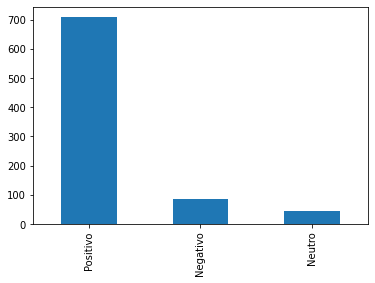

In [ ]:
reviews_mx['sentimentt'] = reviews_mx['sentiment'].replace({-1 : 'Negativo'})
reviews_mx['sentimentt'] = reviews_mx['sentimentt'].replace({0 : 'Neutro'})
reviews_mx['sentimentt'] = reviews_mx['sentimentt'].replace({1 : 'Positivo'})
reviews_mx['sentimentt'].value_counts().plot(kind='bar')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


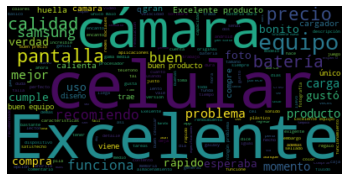

In [ ]:
nltk.download("stopwords")
stopwords = set(stopwords.words('spanish', 'english'))
stopwords.update(["br", "teléfono", "href", "solo", "sólo", "día", "buena", "bueno", "bien", "si"])
text = " ".join(review for review in reviews_mx['content'].astype(str))
wordcloud = wc.WordCloud(stopwords=stopwords).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [ ]:
negative

,id,reviewable_object,date_created,status,title,content,rate,valorization,likes,dislikes,reviewer_id,buying_date,relevance,forbidden_words,Marca,sentiment
10,151666010,MLM1395381120,2022-08-10T22:27:29Z,published,No lo recomiendo,"No lo vale, es un celular con capacidades regu...",1,0,0,0,286440798,2022-06-27T15:44:17Z,35,50,Samsung,-1
87,136631284,MLM911031497',2022-03-07T09:46:33Z,published,Horrible,"Uno de los peores teléfonos que he tenido, ten...",1,13,13,0,466822780,2021-11-16T21:26:30Z,52,0,Samsung,-1
137,144326935,MLM1403010782,2022-05-26T22:42:40Z,published,Producto usado,El producto es usado está rayado y la caja est...,1,44,50,6,173883155,2022-05-25T05:55:44Z,91,0,Samsung,-1
141,151687738,MLM1403010782,2022-08-11T01:43:53Z,published,Equipo rayado usado,Producto usado con rayones en pantalla y era v...,1,0,0,0,71072383,2022-06-29T01:09:42Z,10,0,Samsung,-1
191,121666967,MLM913904144',2021-10-05T17:25:44Z,published,DECEPCION CON SAMSUNG GALAXY,Es el celular mas deficiente que he tenido. Mi...,1,0,14,14,54923997,2021-09-13T00:48:05Z,130,70,Samsung,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3516,136631284,MLM911031497',2022-03-07T09:46:33Z,published,Horrible,"Uno de los peores teléfonos que he tenido, ten...",1,13,13,0,466822780,2021-11-16T21:26:30Z,52,0,Samsung,-1
3806,151666010,MLM1395381120,2022-08-10T22:27:29Z,published,No lo recomiendo,"No lo vale, es un celular con capacidades regu...",1,0,0,0,286440798,2022-06-27T15:44:17Z,35,50,Samsung,-1
3829,136631284,MLM911031497',2022-03-07T09:46:33Z,published,Horrible,"Uno de los peores teléfonos que he tenido, ten...",1,13,13,0,466822780,2021-11-16T21:26:30Z,52,0,Samsung,-1
3835,144326935,MLM1403010782,2022-05-26T22:42:40Z,published,Producto usado,El producto es usado está rayado y la caja est...,1,44,50,6,173883155,2022-05-25T05:55:44Z,91,0,Samsung,-1


In [ ]:
positive

,id,reviewable_object,date_created,status,title,content,rate,valorization,likes,dislikes,reviewer_id,buying_date,relevance,forbidden_words,Marca,sentiment
0,129816983,MLM1348021632,2021-12-28T02:05:43Z,published,Excelente,"Muy bueno, sin fallas, sin ponerse lento. El d...",5,2,3,1,44861575,2021-12-10T18:46:33Z,18,0,Samsung,1
1,129247994,MLM1348021632,2021-12-21T21:58:18Z,published,Recomendado tiene lo que se requiere,"Mejor de lo que esperaba, cumple con mis expe...",5,1,1,0,127947549,2021-12-03T01:14:11Z,9,0,Samsung,1
2,139913365,MLM1348021632,2022-04-11T17:49:41Z,published,Excelente,Muy buen producto. Justo lo que dice ser.,5,0,0,0,570208695,2021-12-11T07:19:24Z,8,0,Samsung,1
3,131320889,MLM1348021632,2022-01-10T19:40:40Z,published,Excelente,3b's vale la pena tener este celular.,5,0,0,0,399913944,2021-12-12T04:39:25Z,8,0,Samsung,1
4,153282194,MLM1348021632,2022-08-27T02:13:06Z,published,Excelente,Muy buen articulo completamente nuevo.,5,0,0,0,46425583,2022-08-12T01:19:40Z,5,0,Samsung,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3844,151572748,MLM1441620866,2022-08-10T00:41:41Z,published,Excelente,"Buen producto, practico y funciona perfectamen...",5,0,0,0,68900076,2022-07-20T06:25:26Z,8,20,Samsung,1
3845,153407910,MLM1415284092,2022-08-29T00:59:08Z,published,100% recomendable no te vas arrepentir!,Recomendado al 100% buena batería hasta por 2 ...,5,0,0,0,284550748,2022-08-13T02:37:11Z,51,0,Samsung,1
3846,150634063,MLM1415284092,2022-07-30T19:21:43Z,published,Bueno,Buen producto me gustó mucho y es el color k e...,5,0,0,0,37074182,2022-07-26T18:00:33Z,11,0,Samsung,1
3847,148218617,MLM1415284092,2022-07-05T02:03:42Z,published,Muy bueno,"El teléfono es muy bueno, pero no incluye carg...",4,0,0,0,85370427,2022-06-30T22:34:57Z,9,0,Samsung,1


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


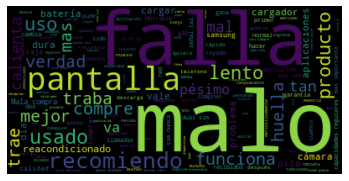

In [ ]:
nltk.download("stopwords")
text1 = " ".join(review for review in negative['content'].astype(str))
text2 = " ".join(review for review in negative['title'].astype(str))
stopwords.update(["teléfono", "href", "solo", "sólo", "día", "buena", "bueno", "bien", "equipo", "celular"])
wordcloud_negativos = wc.WordCloud(stopwords=stopwords).generate(text1+text2)

plt.imshow(wordcloud_negativos, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Importing the NaiveBayesAnalyzer classifier from NLTK
from textblob.sentiments import NaiveBayesAnalyzer
text_general = " ".join(review for review in reviews_mx['content'].astype(str))
text_samsung = " ".join(review for review in reviews_mx[reviews_mx['Marca']=='Samsung']['content'].astype(str))
text_huawei = " ".join(review for review in reviews_mx[reviews_mx['Marca']=='Huawei']['content'].astype(str))
blob_object_general = TextBlob(text_general, analyzer=NaiveBayesAnalyzer())
blob_object_samsung = TextBlob(text_samsung, analyzer=NaiveBayesAnalyzer())
blob_object_huawei = TextBlob(text_huawei, analyzer=NaiveBayesAnalyzer())
# Running sentiment analysis
analysis_general = blob_object_general.sentiment
analysis_samsung = blob_object_samsung.sentiment
analysis_huawei = blob_object_huawei.sentiment
print(analysis_general)
print(analysis_samsung)
print(analysis_huawei)

Sentiment(classification='pos', p_pos=0.9999999989522524, p_neg=1.047747146673004e-09)
Sentiment(classification='pos', p_pos=0.9999999844582539, p_neg=1.5541685057795847e-08)
Sentiment(classification='pos', p_pos=0.9999960607085696, p_neg=3.939291450401996e-06)


# Conclusions



1. Although there is more supply of used products, users prefer to buy new products.
2. Users prefer to buy products from the Xiaomi brand, which has a very good rating, also in second place of most purchased is the Samsung brand, which seems not to be in the first place because the average price is higher and the rating is a little smaller than that of Xiaomi.
3. The price of the products purchased varies, however there is a concentration of around 8,000 and products of lower value.
4. The best-selling models of the Samsung and Huawei brands are A52 and P30 Lite respectively.
5. In general there are few negative and neutral comments about Samsung and Huawei.
6. Negative comments highlight crashes, hangs and slow.
7. The last script, making use of sentiment analysis from the NaiveBayesAnalyzer library, shows that there are very few negative comments.

